In [1]:
# For query
import sys   
sys.path.append('../../src/data')
import query_flights as query
from datetime import date

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

In [2]:
ls ../../data/processed

airlines.db


In [3]:
start_date = date(2016, 1, 1)
end_date = date(2016, 12, 31)
path_to_db = "sqlite:///../../data/processed/airlines.db"

flights_2016 = query.flight_and_delay_summary_by_airport(start_date=start_date, 
                                                        end_date=end_date, 
                                                        path_to_db=path_to_db)

Connecting to Database: sqlite:///../../data/processed/airlines.db


In [4]:
total = sum(flights_2016['departure_count'])
delayed = sum(flights_2016['delayed_count'])
fraction_delayed = round(delayed / total * 100, 2)

print(f"Of the {total:,} flights represented in the 2016 data, {delayed:,} ({fraction_delayed}%) were delayed.")

Of the 5,605,611 flights represented in the 2016 data, 927,298 (16.54%) were delayed.


In [5]:
start_date = date(2017, 1, 1)
end_date = date(2017, 12, 31)
path_to_db = "sqlite:///../../data/processed/airlines.db"

flights_2017 = query.flight_and_delay_summary_by_airport(start_date=start_date, 
                                                        end_date=end_date, 
                                                        path_to_db=path_to_db)

Connecting to Database: sqlite:///../../data/processed/airlines.db


In [6]:
total = sum(flights_2017['departure_count'])
delayed = sum(flights_2017['delayed_count'])
fraction_delayed = round(delayed / total * 100, 2)

print(f"Of the {total:,} flights represented in the 2017 data, {delayed:,} ({fraction_delayed}%) were delayed.")

Of the 5,661,600 flights represented in the 2017 data, 989,432 (17.48%) were delayed.


In [7]:
flights_2017['fraction_delayed'] = flights_2017['departure_count'] / flights_2017['delayed_count']
busiest_2017 = flights_2017.sort_values(by='departure_count', ascending=False).head(20)
busiest_2017

,airport_name,airport_code,departure_count,delayed_count,fraction_delayed
20,Hartsfield-Jackson Atlanta International,ATL,363955,57742,6.303124
224,Chicago O'Hare International,ORD,265918,52474,5.067614
82,Denver International,DEN,222625,39659,5.613480
172,Los Angeles International,LAX,213769,45741,4.673466
83,Dallas/Fort Worth International,DFW,180771,35667,5.068298
275,San Francisco International,SFO,174223,41687,4.179312
236,Phoenix Sky Harbor International,PHX,154147,24162,6.379728
170,McCarran International,LAS,151365,29285,5.168687
274,Seattle/Tacoma International,SEA,136847,22954,5.961793
212,Minneapolis-St Paul International,MSP,134317,17832,7.532358


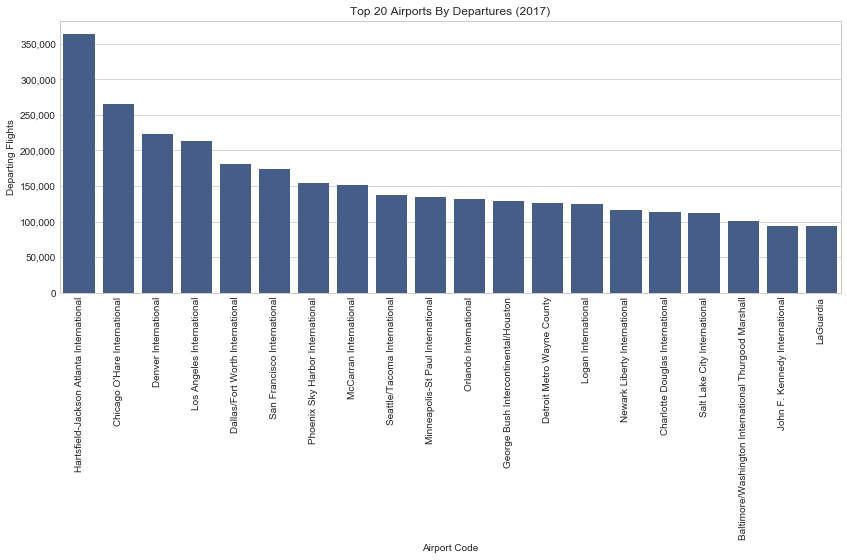

In [8]:
a4_dims = (14, 5)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.barplot(data=busiest_2017, x='airport_name', y='departure_count', ax=ax, color='#3b5b92')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
_ = plt.xlabel('Airport Code')
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Departing Flights')
_ = plt.title(f'Top {len(busiest_2017)} Airports By Departures (2017)')
plt.show()